In [42]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
from mpltools import style
from mpltools import layout
import seaborn as sns
style.use('ggplot')
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [43]:
train = pd.read_csv("train.csv")
train_copy = train
test = pd.read_csv("test.csv")
daily = pd.read_csv("daily_aggregate.csv")
roaming = pd.read_csv("roaming_monthly.csv")
calendar = pd.read_csv("calendar_ref.csv")
contract = pd.read_csv("contract_ref.csv")

## Usage

Visualize the usage over the 5 month period

In [44]:
cols = ["206_USAGE", "207_USAGE", "208_USAGE", "209_USAGE", "210_USAGE"]
columns=["USAGE", "TARGET", "MONTH"]
df = pd.DataFrame(columns=columns)
for c in cols:
    d = train[[c, "TARGET"]]
    d["MONTH"] = c.split("_")[0]
    d.columns = columns
    df = df.append(d)

/Library/Python/2.7/site-packages/IPython/kernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


[None]

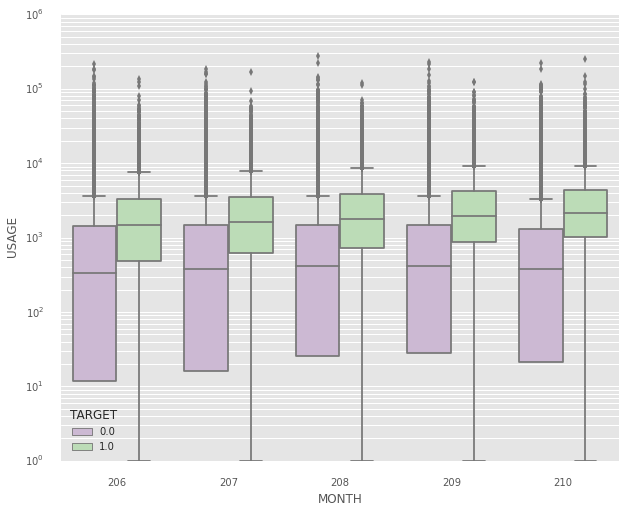

In [45]:
ax = sns.boxplot(x="MONTH", y="USAGE", hue="TARGET", data=df, palette="PRGn")
sns.despine(offset=10, trim=True)
ax.set(yscale="log")

### Mean usage over months

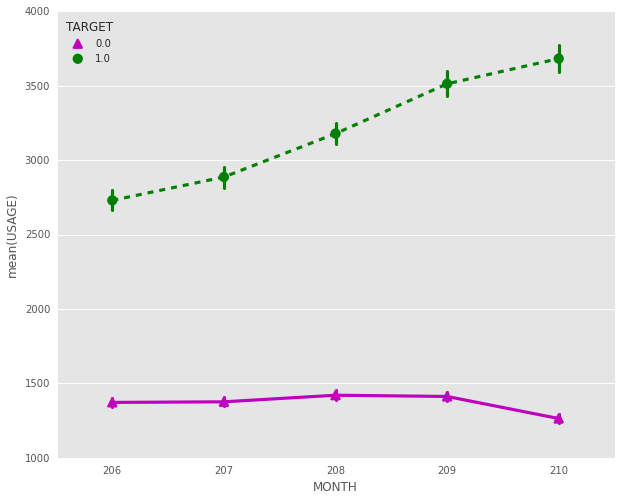

In [46]:
sns.pointplot(x="MONTH", y="USAGE", hue="TARGET", data=df,
              palette={1: "g", 0: "m"},
              markers=["^", "o"], linestyles=["-", "--"]);

### Median usage over months

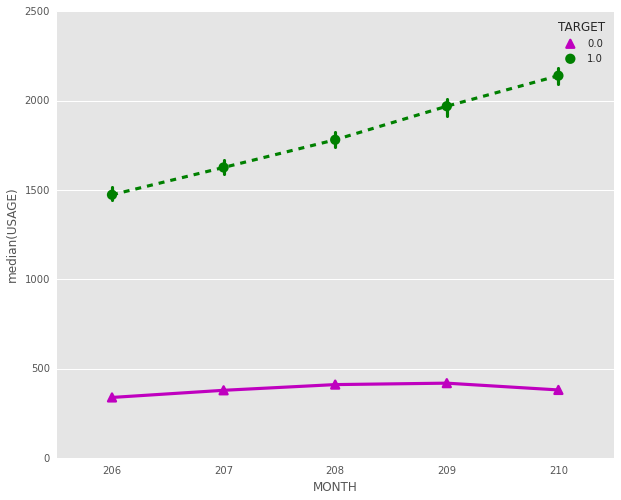

In [47]:
sns.pointplot(x="MONTH", y="USAGE", hue="TARGET", data=df,
              estimator=np.median,
              palette={1: "g", 0: "m"},
              markers=["^", "o"], linestyles=["-", "--"]);

### Quick look on the change of the difference between each two months

In [48]:
dif_cols = ["207-206", "208-207", "209-208", "210-219"]
for i in range(len(dif_cols)):
    train[dif_cols[i]] = train[cols[i + 1]] - train[cols[i]]

In [49]:
columns=["USAGE", "TARGET", "MONTH_DIFFERENCE"]
df = pd.DataFrame(columns=columns)
for c in dif_cols:
    d = train[[c, "TARGET"]]
    d["MONTH_DIFFERENCE"] = c
    d.columns = columns
    df = df.append(d)

/Library/Python/2.7/site-packages/IPython/kernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


[None]

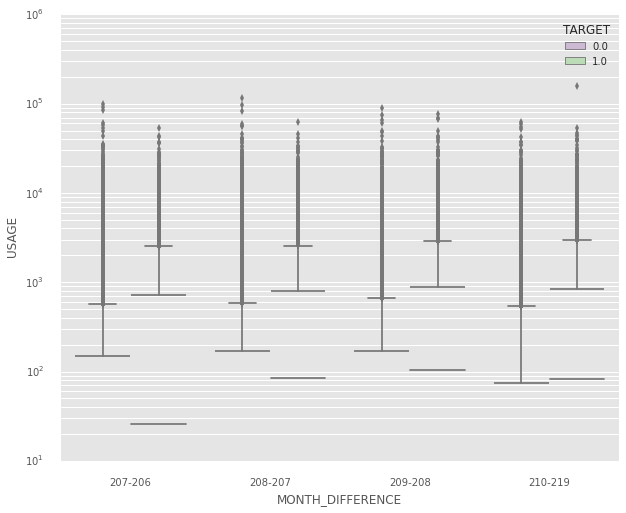

In [50]:
ax = sns.boxplot(x="MONTH_DIFFERENCE", y="USAGE", hue="TARGET", data=df, palette="PRGn")
sns.despine(offset=10, trim=True)
ax.set(yscale="log")

### Mean usage difference

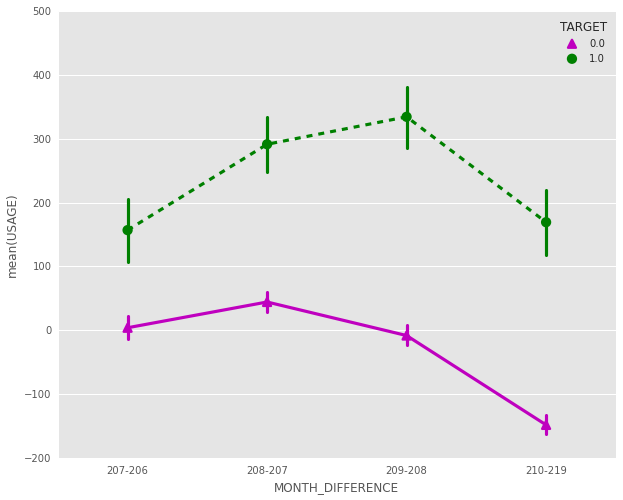

In [51]:
sns.pointplot(x="MONTH_DIFFERENCE", y="USAGE", hue="TARGET", data=df,
              palette={1: "g", 0: "m"},
              markers=["^", "o"], linestyles=["-", "--"]);

#### Plotting the difference between the last and first month agains the target variable

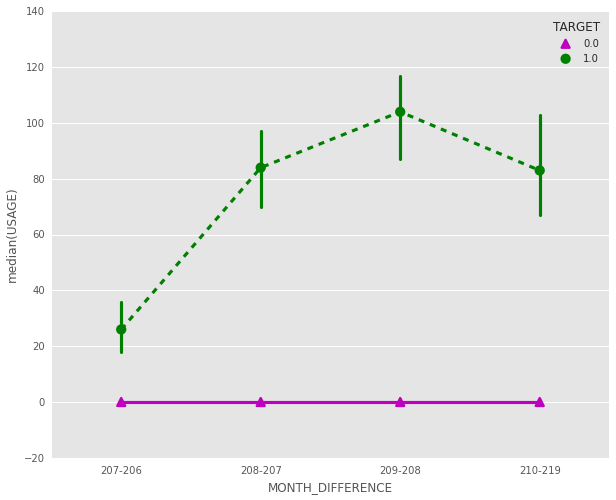

In [52]:
sns.pointplot(x="MONTH_DIFFERENCE", y="USAGE", hue="TARGET", data=df,
              palette={1: "g", 0: "m"},
              estimator=np.median,
              markers=["^", "o"], linestyles=["-", "--"]);

In [20]:
train["OVERALL_DIFFERENCE"] = train[cols[4]] - train[cols[0]]

[None]

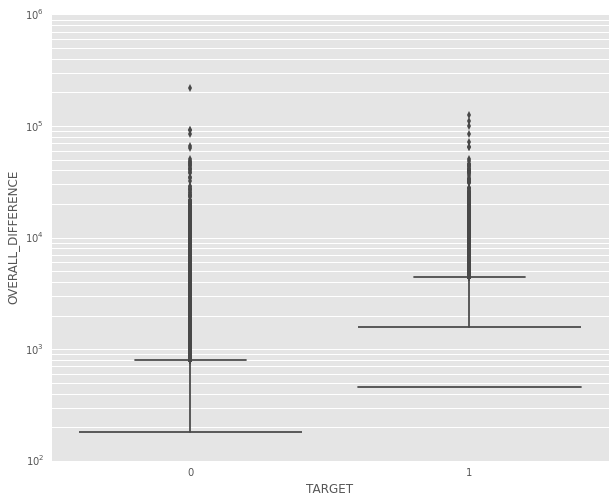

In [21]:
ax = sns.boxplot(x="TARGET", y="OVERALL_DIFFERENCE", data=train)
ax.set(yscale = 'log')

## Session Count

In [22]:
cols = ["206_SESSION_COUNT", "207_SESSION_COUNT",
        "208_SESSION_COUNT", "209_SESSION_COUNT", "210_SESSION_COUNT"]
columns=["SESSION_COUNT", "TARGET", "MONTH"]
df = pd.DataFrame(columns=columns)
for c in cols:
    d = train[[c, "TARGET"]]
    d["MONTH"] = c.split("_")[0]
    d.columns = columns
    df = df.append(d)

/Library/Python/2.7/site-packages/IPython/kernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


[None]

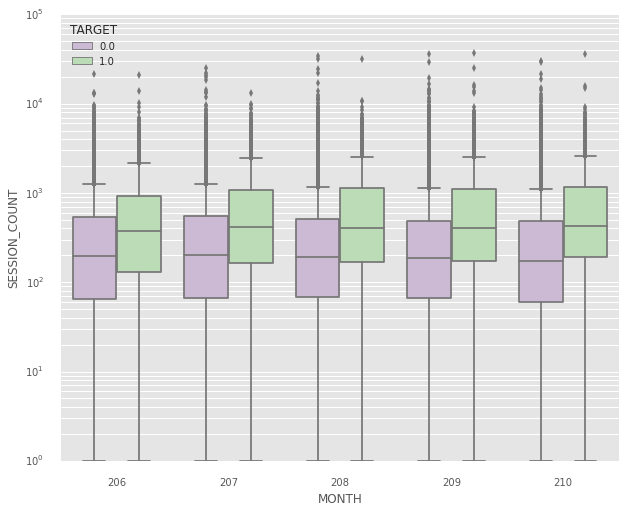

In [23]:
ax = sns.boxplot(x="MONTH", y="SESSION_COUNT", hue="TARGET", data=df, palette="PRGn")
sns.despine(offset=10, trim=True)
ax.set(yscale="log")

### Mean Session count over months

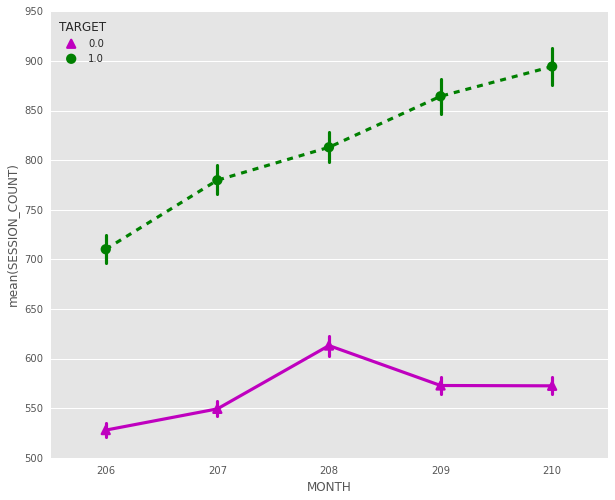

In [24]:
sns.pointplot(x="MONTH", y="SESSION_COUNT", hue="TARGET", data=df,
              palette={1: "g", 0: "m"},
              markers=["^", "o"], linestyles=["-", "--"]);

### Median Session Count over months

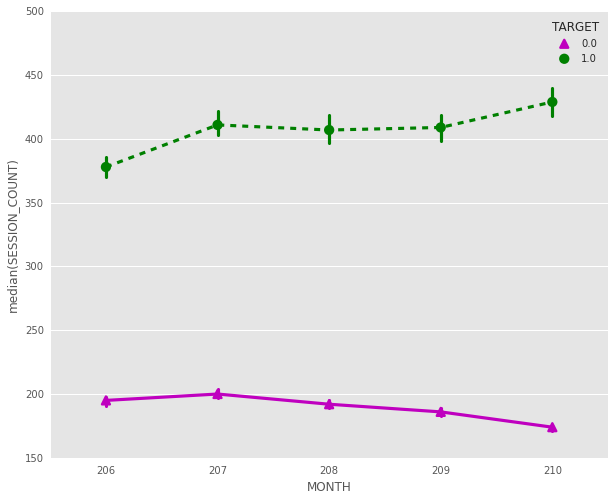

In [25]:
sns.pointplot(x="MONTH", y="SESSION_COUNT", hue="TARGET", data=df,
              estimator=np.median,
              palette={1: "g", 0: "m"},
              markers=["^", "o"], linestyles=["-", "--"]);

### USAGE per Session

In [26]:
sessions = ["206_SESSION_COUNT", "207_SESSION_COUNT", "208_SESSION_COUNT",
        "209_SESSION_COUNT", "210_SESSION_COUNT"]
usages = ["206_USAGE", "207_USAGE", "208_USAGE", "209_USAGE", "210_USAGE"]
session_usages = [s.split("_")[0] + "_SESSION_USAGE" for s in sessions]

for i in range(len(sessions)):
    month = sessions[i].split("_")[0]
    train[session_usages[i]] = train[usages[i]] * 1.0 / train[sessions[i]]


In [27]:
columns=["SESSION_USAGE", "TARGET", "MONTH"]
df = pd.DataFrame(columns=columns)
for c in session_usages:
    d = train[[c, "TARGET"]]
    d["MONTH"] = c.split("_")[0]
    d.columns = columns
    df = df.append(d)

/Library/Python/2.7/site-packages/IPython/kernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


### Usage per Session over months

[None]

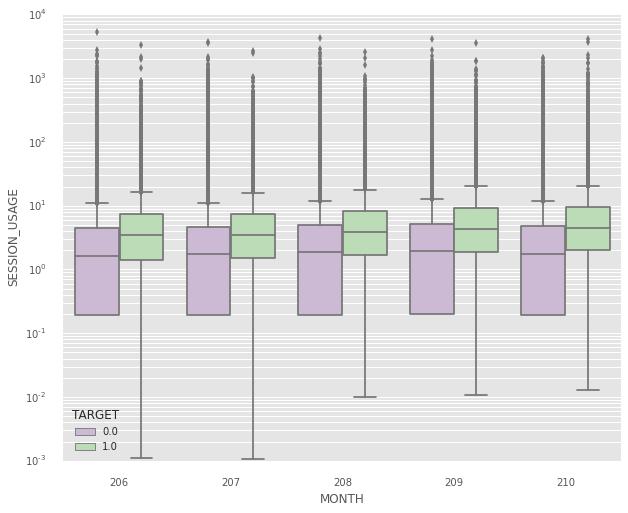

In [28]:
ax = sns.boxplot(x="MONTH", y="SESSION_USAGE", hue="TARGET", data=df, palette="PRGn")
sns.despine(offset=10, trim=True)
ax.set(yscale="log")

### Median Usage per Session over months

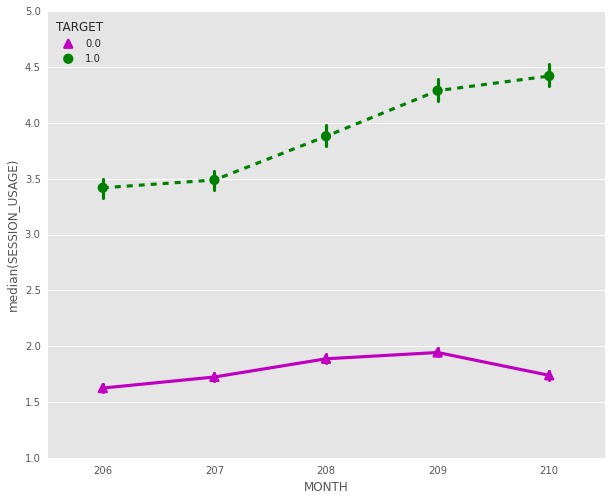

In [29]:
sns.pointplot(x="MONTH", y="SESSION_USAGE", hue="TARGET", data=df,
              estimator=np.median,
              palette={1: "g", 0: "m"},
              markers=["^", "o"], linestyles=["-", "--"]);

### Features vs Target - PCA analysis 

In [30]:
q = train_copy
X = q[(q.keys().difference(['TARGET', "CONTRACT_KEY"]))].values
y = q["TARGET"].values

In [33]:
pca = PCA(n_components=3)
reduced = pca.fit_transform(X)

In [36]:
reduced[0]

array([-7492.39370289,  1485.67299675,   312.76895877])

This shows how the features in train.csv divide the target variable in 3 dimension space.

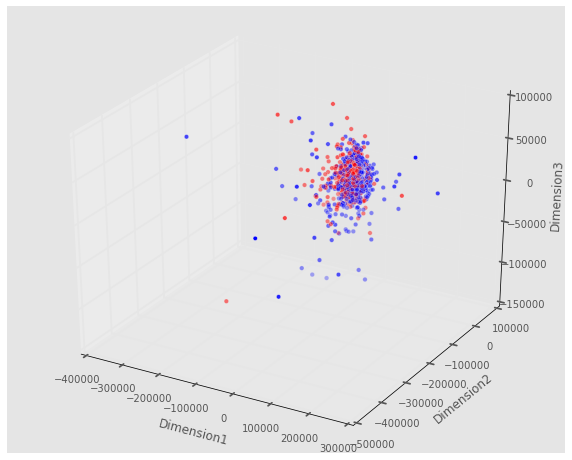

In [39]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
color = ["r" if b else "b" for b in y]
ax.scatter(xs = map(lambda x: x[1], reduced),
               ys = map(lambda x: x[0], reduced),
               zs = map(lambda x: x[2], reduced),
               c=color)
ax.set_xlabel('Dimension1')
ax.set_ylabel('Dimension2')
ax.set_zlabel('Dimension3')